# Dataset Information

- 50.000 comments of films: 25.000 for training, 25.000 for test. Between positive and negative.
- 50.000 comments of films to unsupervised learning 
- Every comment have a mark up to 10.
    - Less than 4 --> negative, label = (0)
    - More than 7 --> positive, label = (1)

Now, We have to visualize the data.

## Estructure

In [ ]:
import os
import pandas as pd 


# This script loads the IMDB movie reviews dataset from a specified directory structure,
def load_imdb(path, split):
    rows = []
    for label in ['pos', 'neg']:
        folder = os.path.join(path, split, label)
        for fname in os.listdir(folder):
            with open (os.path.join(folder, fname), encoding='utf8') as f:
                rows.append({'review': f.read(), 'label': 1 if label == 'pos' else 0})
        
    return pd.DataFrame(rows)
    
df_train = load_imdb('../data/aclImdb', 'train')
df_test = load_imdb('../data/aclImdb', 'test')
df = pd.concat([df_train, df_test]).reset_index(drop=True)

# Save the combined dataset to a CSV file
df_train.to_csv('../data/imdb_reviews_train.csv', index=False)
df_test.to_csv('../data/imdb_reviews_test.csv', index=False)

# Visualize the first few rows
print(df.head())

                                              review  label
0  Bromwell High is a cartoon comedy. It ran at t...      1
1  Homelessness (or Houselessness as George Carli...      1
2  Brilliant over-acting by Lesley Ann Warren. Be...      1
3  This is easily the most underrated film inn th...      1
4  This is not the typical Mel Brooks film. It wa...      1


In [ ]:
# First Visualization:
print(df.shape)
print(df['label'].value_counts())
print(df['review'].apply(len).describe())

(50000, 2)
label
1    25000
0    25000
Name: count, dtype: int64
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review, dtype: float64


### Analysis

Dataset with perfect balance. 

Minimum --> 32 characters
25 % --> 699 characters
Median --> 970 characters
75% --> 1590 characters
Maximum --> 13.704 characters
Mean --> 1.309 characters
std --> 990 characters

Comments are so long, th mean of characters is 970 so it is good for trainning the model. There are some outliers with 13.704 characteres, we could limit the length to avoid problems. The std is variable, I have to know that for the tokenization.

Recomendations:

1. For a classical model, we have to limit the length to accelerate the process without losing information

2. For Deep Learning we have to define
    - Màx 512 or 1024 tokens
    - Truncate or padding

In [19]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = text.lower()
    return text

df['clean'] = df['review'].apply(clean_text)
df[['review', 'clean']].sample(3)

,review,clean
33474,I saw Teen Devian in 1993 telecasted in Doorda...,i saw teen devian in telecasted in doorda...
18720,This movie is terrible. Carlitos Way(1993) is ...,this movie is terrible carlitos way is ...
40259,"Yeah, what did I expect? I thought this would ...",yeah what did i expect i thought this would ...


## Figures

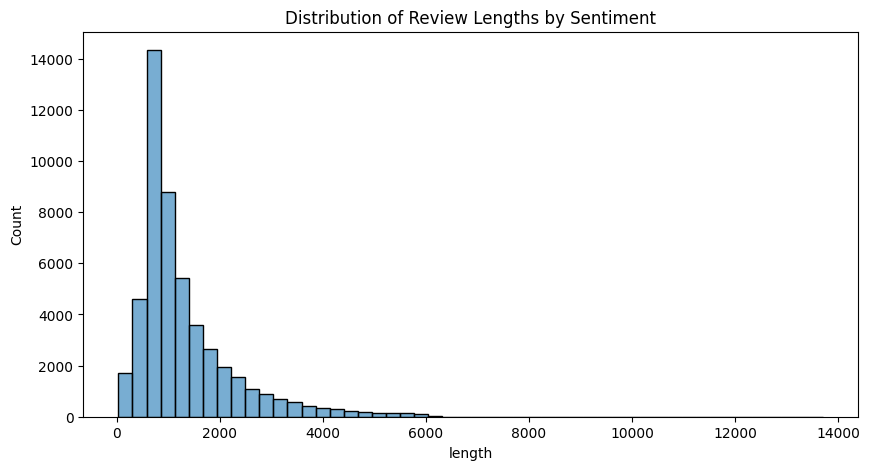

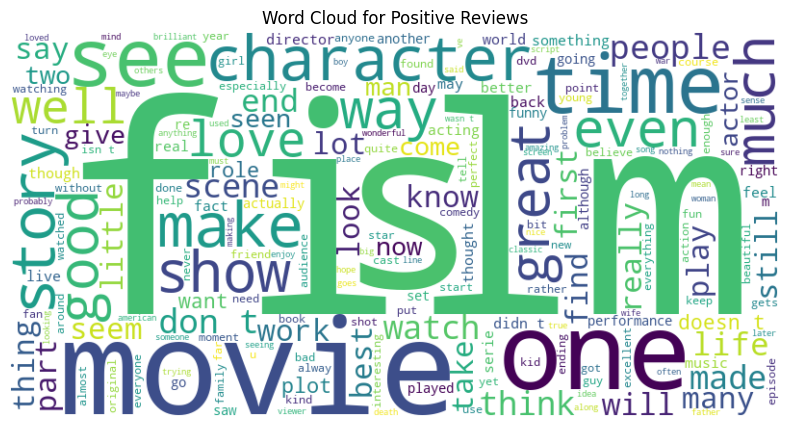

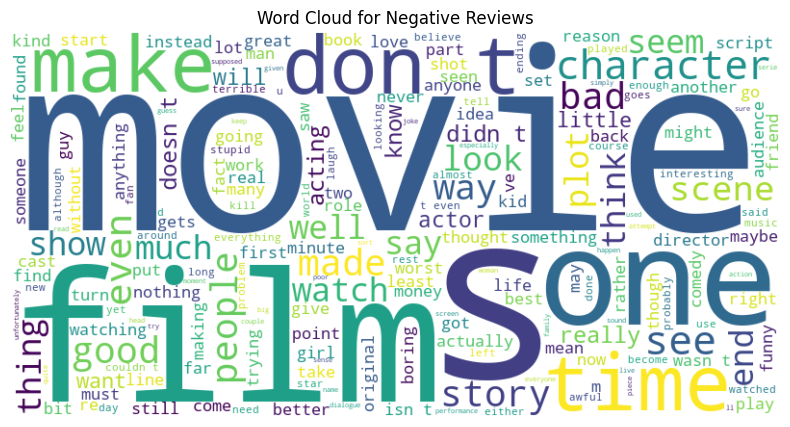

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df['length'] = df['review'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='length', bins=50, alpha=0.6)
plt.title("Distribution of Review Lengths by Sentiment")
plt.show()

text_pos = ' '.join(df[df['label'] == 1]['clean'])
text_neg = ' '.join(df[df['label'] == 0]['clean'])

plt.figure(figsize=(10, 5))
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(text_pos)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
wc_neg = WordCloud(width=800, height=400, background_color='white').generate(text_neg)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()